<a href="https://colab.research.google.com/github/krsnoki/Stroke_prediction/blob/main/Stroke_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Based on the classified result, the percentage of occurrence of stroke is computed using
 Linear Regression.
 For the evaluation of models, assessment methods such as
 Mean Squared Error(MSE),
 Root Mean Squared Error(RMSE),
 Mean Absolute Error(MAE),
 R2 Score


# Stroke Prediction System

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Importing dataset

Name: Healthcare and stroke dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stroke_prediction/healthcare-dataset-stroke-data.csv')

In [ ]:
df2 = df

In [ ]:
df = df.drop(['id'], axis=1)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.isnull().count()

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
stroke               5110
dtype: int64

In [ ]:
# inputs = inputs.drop(['bmi'], axis=1)   #dropping entire feature
df = df.dropna(subset=['bmi'])  #dropping NaN values

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [ ]:
# Nature of training features

# <h2>Data preprocessing with categorical and numerical transformers</h2>

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df.duplicated()

0       False
2       False
3       False
4       False
5       False
        ...  
5104    False
5106    False
5107    False
5108    False
5109    False
Length: 4909, dtype: bool

In [ ]:
categorical = df.select_dtypes(exclude='number')
categorical

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
5104,Female,No,children,Rural,Unknown
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
target = df.iloc[:, -1:]
target.columns

Index(['stroke'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

sS = StandardScaler()
labelencoder = LabelEncoder()

In [ ]:
for column in categorical:
    numericColumn = labelencoder.fit_transform(categorical[column])
    df[column] = numericColumn

In [ ]:
inputs = df.drop('stroke', axis=1)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [ ]:
scaledData = sS.fit_transform(df.drop(['stroke'], axis='columns'))
scaledData

array([[ 1.19842812,  1.07013796, -0.31806673, ...,  2.77769839,
         0.98134488, -0.35178804],
       [ 1.19842812,  1.64656262, -0.31806673, ...,  0.0138418 ,
         0.45926914,  0.58523176],
       [-0.83302341,  0.27201152, -0.31806673, ...,  1.48413156,
         0.70120668,  1.52225157],
       ...,
       [-0.83302341, -0.34875349, -0.31806673, ..., -0.50236926,
         0.21733161,  0.58523176],
       [ 1.19842812,  0.36069224, -0.31806673, ...,  1.37291993,
        -0.41934612, -0.35178804],
       [-0.83302341,  0.05030973, -0.31806673, ..., -0.45081569,
        -0.34294479, -1.28880785]])

In [ ]:
scaledDf = pd.DataFrame(data=scaledData, columns = [i for i, j in inputs.items()])

In [ ]:
inputs = scaledDf
inputs

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.198428,1.070138,-0.318067,4.381968,0.729484,-0.155697,0.985640,2.777698,0.981345,-0.351788
1,1.198428,1.646563,-0.318067,4.381968,0.729484,-0.155697,-1.014569,0.013842,0.459269,0.585232
2,-0.833023,0.272012,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.484132,0.701207,1.522252
3,-0.833023,1.602222,3.143994,-0.228208,0.729484,0.759651,-1.014569,1.549193,-0.623083,0.585232
4,1.198428,1.690903,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.821368,0.013595,-0.351788
...,...,...,...,...,...,...,...,...,...,...
4904,-0.833023,-1.324241,-0.318067,-0.228208,-1.370831,1.674998,-1.014569,-0.050094,-1.310695,-1.288808
4905,-0.833023,1.690903,-0.318067,-0.228208,0.729484,0.759651,0.985640,0.447882,1.414286,0.585232
4906,-0.833023,-0.348753,-0.318067,-0.228208,0.729484,0.759651,-1.014569,-0.502369,0.217332,0.585232
4907,1.198428,0.360692,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,1.372920,-0.419346,-0.351788


In [ ]:
inputs.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4.909000e+03,4.909000e+03,4909.000000,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03
mean,-2.315886e-17,1.679017e-16,0.000000,-6.368686e-17,-2.460629e-17,-1.223077e-16,5.934458e-17,4.631772e-17,2.894857e-18,2.894857e-17
std,1.000102e+00,1.000102e+00,1.000102,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-8.330234e-01,-1.897119e+00,-0.318067,-2.282079e-01,-1.370831e+00,-1.986391e+00,-1.014569e+00,-1.129792e+00,-2.367580e+00,-1.288808e+00
25%,-8.330234e-01,-7.921571e-01,-0.318067,-2.282079e-01,-1.370831e+00,-1.556967e-01,-1.014569e+00,-6.356431e-01,-6.867508e-01,-1.288808e+00
50%,-8.330234e-01,5.030973e-02,-0.318067,-2.282079e-01,7.294843e-01,-1.556967e-01,9.856399e-01,-3.067358e-01,-1.010073e-01,5.852318e-01
75%,1.198428e+00,7.597555e-01,-0.318067,-2.282079e-01,7.294843e-01,7.596506e-01,9.856399e-01,1.860622e-01,5.356705e-01,5.852318e-01
max,3.229880e+00,1.735243e+00,3.143994,4.381968e+00,7.294843e-01,1.674998e+00,9.856399e-01,3.746860e+00,8.748813e+00,1.522252e+00


##<h3>Defining X and Y (targets and inputs)</h3>

In [ ]:
df['bmi'].nunique()

418

In [ ]:
inputs.shape, target.shape

((4909, 10), (4909, 1))

In [ ]:
Xlabels = []
for i, j in df.items():
  Xlabels.append(i)
ylabels = Xlabels[-1:]
Xlabels = Xlabels[:-1]

## **using SMOTE to oversmaple data for positive results of stroke**
oversampled data enteries are synthetically generated


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=0)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(inputs, target)

In [ ]:
X_resampled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.198428,1.070138,-0.318067,4.381968,0.729484,-0.155697,0.985640,2.777698,0.981345,-0.351788
1,1.198428,1.646563,-0.318067,4.381968,0.729484,-0.155697,-1.014569,0.013842,0.459269,0.585232
2,-0.833023,0.272012,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.484132,0.701207,1.522252
3,-0.833023,1.602222,3.143994,-0.228208,0.729484,0.759651,-1.014569,1.549193,-0.623083,0.585232
4,1.198428,1.690903,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.821368,0.013595,-0.351788
...,...,...,...,...,...,...,...,...,...,...
9395,1.198428,1.388843,-0.318067,-0.228208,0.729484,0.759651,-1.014569,-0.125226,0.480861,0.875380
9396,-0.833023,1.329305,3.143994,-0.228208,0.729484,0.759651,-1.014569,1.951914,-0.430707,0.585232
9397,-0.833023,0.662189,-0.318067,-0.228208,-1.040722,-0.155697,0.985640,-0.401180,0.994053,0.585232
9398,1.198428,1.694401,-0.318067,-0.228208,0.729484,0.687435,-1.014569,-0.318626,0.300113,0.511306


In [ ]:
y_resampled['stroke'].value_counts()

stroke
1    4700
0    4700
Name: count, dtype: int64

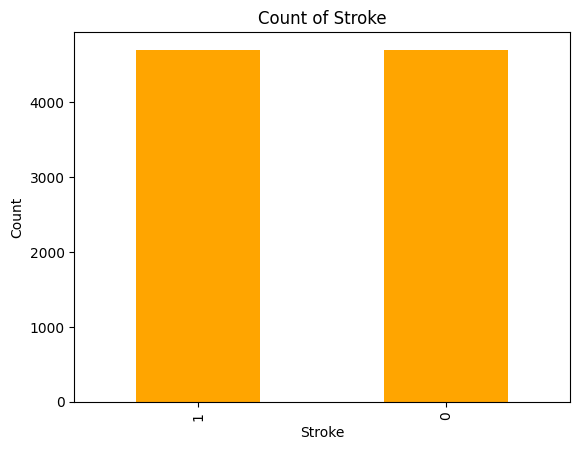

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = y_resampled['stroke'].value_counts()
counts.plot(kind='bar', color='orange')
plt.title('Count of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
corr = df.corr()

In [ ]:
corr['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.232331
hypertension         0.142515
avg_glucose_level    0.138936
heart_disease        0.137938
ever_married         0.105089
smoking_status       0.051558
bmi                  0.042374
gender               0.006757
Residence_type       0.006031
work_type           -0.033756
Name: stroke, dtype: float64

This implies that here age can be the major facttor for occurence of stroke to the person

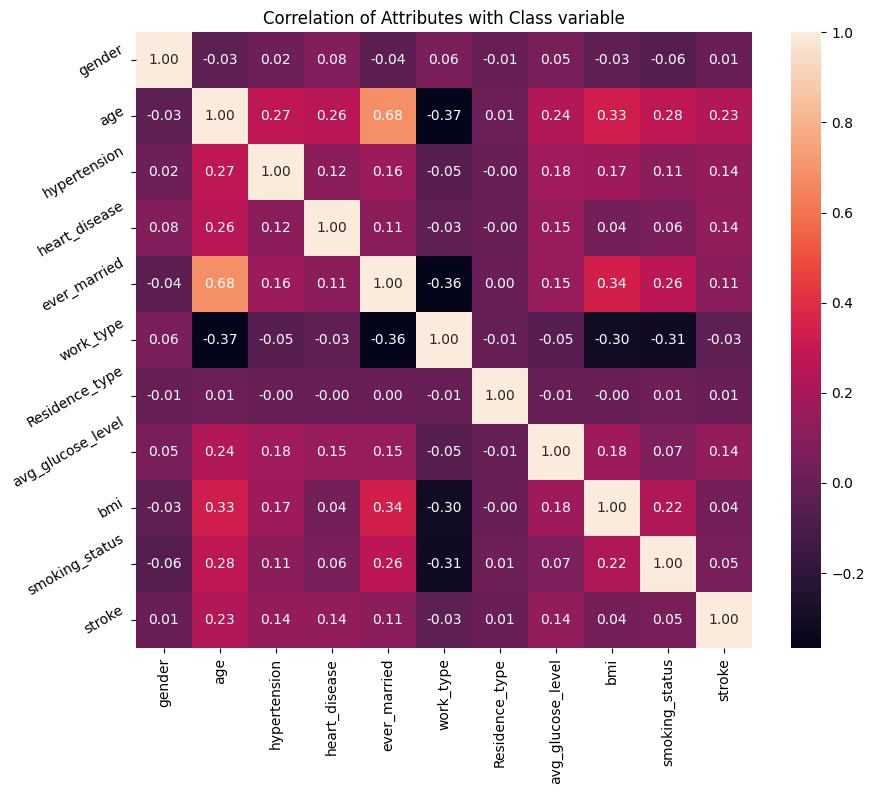

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

##<h3>Training and Testing</h3>

splitting dataset into training and testing sets with train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7520, 10), (7520, 1), (1880, 10), (1880, 1))

In [ ]:
X_train= X_train.to_numpy()
X_test = X_test.to_numpy()
y_train= y_train.to_numpy()
y_test= y_test.to_numpy()

# **Classification for result**

##<h2>Logistic Regression</h2>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_train = y_train.ravel()

In [ ]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, predictions)*100))

Model accuracy score: 76.6489%


In [ ]:
print("\nClassification Report(Logistic Regression):")
print(classification_report(y_test, predictions))


Classification Report(Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       922
           1       0.77      0.77      0.77       958

    accuracy                           0.77      1880
   macro avg       0.77      0.77      0.77      1880
weighted avg       0.77      0.77      0.77      1880



##<h2>KNN Classifier</h2>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acc = []
y_knn = []
for i in range(1, 6):
  #for five neighbors
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  y_knn.append(y_pred)
  acc.append((accuracy_score(y_test, y_pred)*100))

  print("\nClassification Report(Logistic Regression) {}:".format(i))
  print(classification_report(y_test, y_pred))



Classification Report(Logistic Regression) 1:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       922
           1       0.92      0.99      0.95       958

    accuracy                           0.95      1880
   macro avg       0.96      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880


Classification Report(Logistic Regression) 2:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       922
           1       0.92      0.97      0.95       958

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880


Classification Report(Logistic Regression) 3:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       922
           1       0.87      0.99      0.93       958

    accuracy                           0.

In [ ]:
y_knn

[array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 1, 1])]

In [ ]:
for i in range(0, 5):
  print('Accuracy for {} neighbors: {:.4f}%'.format(i+1, acc[i]))

Accuracy for 1 neighbors: 95.2128%
Accuracy for 2 neighbors: 94.6277%
Accuracy for 3 neighbors: 92.0745%
Accuracy for 4 neighbors: 92.5000%
Accuracy for 5 neighbors: 90.7979%


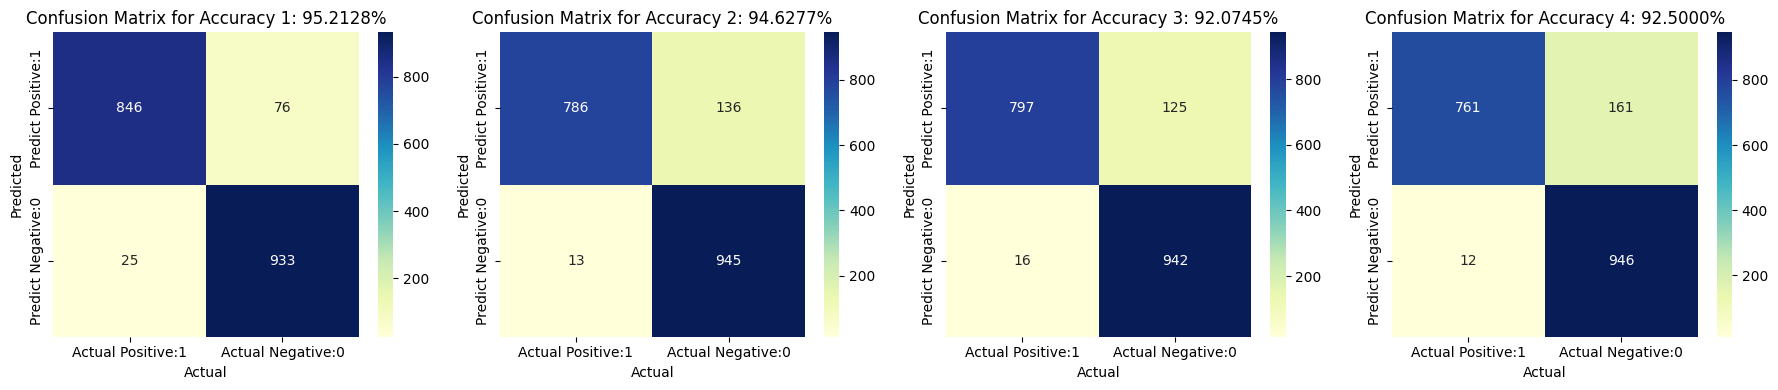

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
for i, (accuracy, ax) in enumerate(zip(acc, axes.flatten()), 1):
    cm = confusion_matrix(y_test, y_knn[i])

    cm_matrix = pd.DataFrame(data=cm,
                             columns=['Actual Positive:1', 'Actual Negative:0'],
                             index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title(f"Confusion Matrix for Accuracy {i}: {accuracy:.4f}%")
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()



## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', C=100.0)
svm.fit(X_train, y_train)

SVC(C=100.0, kernel='linear')

In [ ]:
y_svm = svm.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_svm)*100))

Model accuracy score: 76.6489%


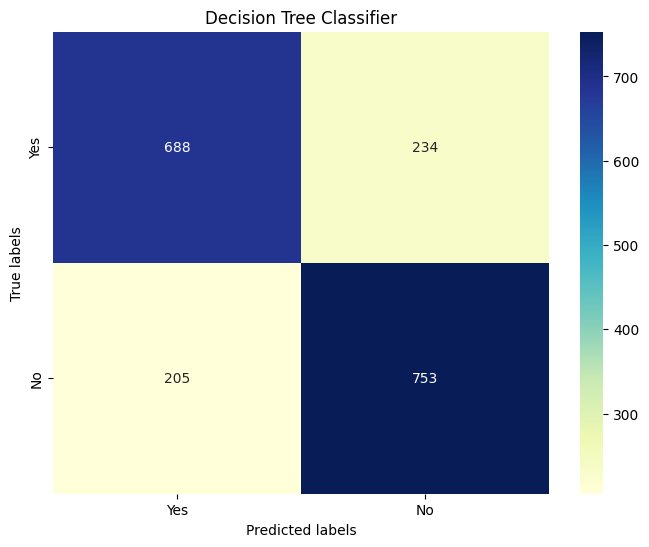

In [ ]:
cm = confusion_matrix(y_test, y_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision Tree Classifier')
plt.show()

In [ ]:
print("\nClassification Report(SVM):")
print(classification_report(y_test, y_svm))


Classification Report(SVM):
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       922
           1       0.76      0.79      0.77       958

    accuracy                           0.77      1880
   macro avg       0.77      0.77      0.77      1880
weighted avg       0.77      0.77      0.77      1880



## <h2>Decision Tree Classifier</h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_dt = dt_classifier.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_dt)*100))
print("Accuracy(Decision Tree):", accuracy)
print("\nClassification Report(Decision Tree):")
print(classification_report(y_test, y_dt))

Model accuracy score: 92.1277%
Accuracy(Decision Tree): 92.5

Classification Report(Decision Tree):
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       922
           1       0.92      0.93      0.92       958

    accuracy                           0.92      1880
   macro avg       0.92      0.92      0.92      1880
weighted avg       0.92      0.92      0.92      1880



In [ ]:
print("\nConfusion Matrix(Decision Tree):")
print(confusion_matrix(y_test, y_dt))


Confusion Matrix(Decision Tree):
[[843  79]
 [ 69 889]]


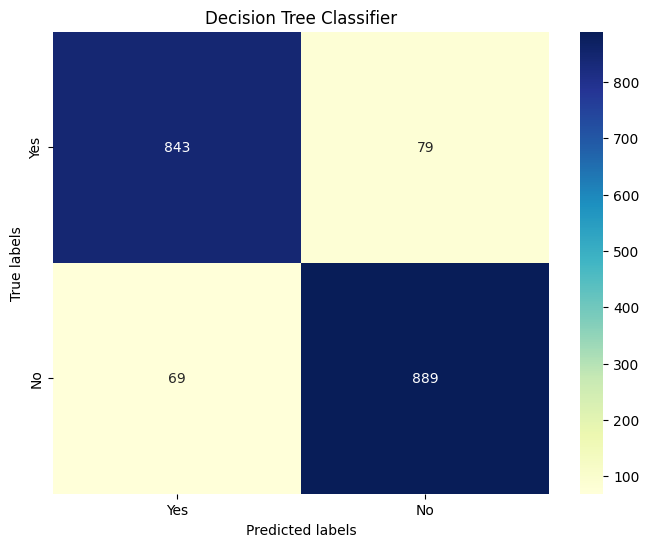

In [ ]:
cm = confusion_matrix(y_test, y_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision Tree Classifier')
plt.show()

## <h2>Random Forest Classifier</h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)
y_rf = rf_classifier.predict(X_test)
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_rf)*100))

print("\nClassification Report(RandomForest):")
print(classification_report(y_test, y_rf))

# Print confusion matrix
print("\nConfusion Matrix(RandomForest):")
print(confusion_matrix(y_test, y_rf))


Model accuracy score: 97.0745%

Classification Report(RandomForest):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       922
           1       0.97      0.97      0.97       958

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880


Confusion Matrix(RandomForest):
[[895  27]
 [ 28 930]]


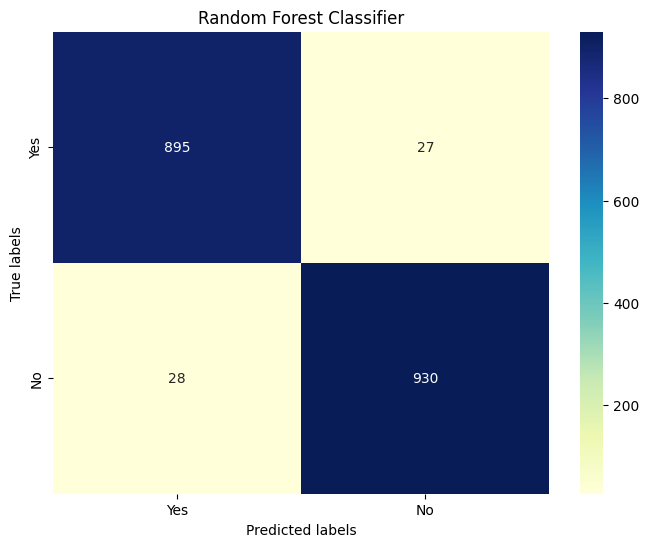

In [ ]:
cm = confusion_matrix(y_test, y_rf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Classifier')
plt.show()

In [ ]:
test_X = np.array(inputs[0:1])
test_X

array([[ 1.19842812,  1.07013796, -0.31806673,  4.38196829,  0.72948428,
        -0.15569667,  0.98563987,  2.77769839,  0.98134488, -0.35178804]])

In [ ]:
res = dt_classifier.predict(test_X)
res

array([1])

# Prediction of result

 <h2>Linear Regression</h2>

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_LR.intercept_

0.3187222211218953

In [ ]:
model_LR.coef_

array([-0.00064432,  0.29907539,  0.03007136,  0.01703896, -0.01999108,
        0.0413963 , -0.00145852,  0.03953221, -0.02408725,  0.01327002])

In [ ]:
predLR = abs((model_LR.predict(X_test)*100).round())
predLR.shape, y_test.shape

((1880,), (1880, 1))

In [ ]:
stroke_chances = pd.DataFrame({
    'stroke': y_test[:, 0],
    'chances': predLR
})
stroke_chances

,stroke,chances
0,0,58.0
1,0,18.0
2,0,4.0
3,1,73.0
4,0,26.0
...,...,...
1875,0,87.0
1876,0,52.0
1877,0,9.0
1878,0,63.0


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)*100

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)


Coefficients: [-0.00064554  0.29899248  0.0300808   0.01704702 -0.0199372   0.04138192
 -0.00145707  0.03953347 -0.02408417  0.0132718 ]
Intercept: 0.31874496400198726


In [ ]:
y_pred

array([ 57.6353481 , -17.72435511,   4.33098157, ...,  -9.28824658,
        62.91615496,  38.36909445])

In [ ]:
predLR.shape

(1880,)

In [ ]:
element_wise_equal = sum(1 for x, y in zip(predLR, y_pred) if x == y)

total_elements = len(predLR)
equality_percentage = (element_wise_equal / total_elements) * 100
print(element_wise_equal)

print("Percentage of equality:", equality_percentage)

0
Percentage of equality: 0.0


## Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Calculate metrics
mse = mean_squared_error(predLR, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(predLR, y_pred)
r2 = r2_score(predLR, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0001
Mean Absolute Error (MAE): 0.0000
R^2 Score: 1.0000
